# Plot Blood Pressure

Change History
9/28/2021 Started
10/15/2021 Reviewed and tidied up for production use.
10/23/2021 Modified to use pandas resampling toolset instead of iso_date

In [15]:
import pandas
from pathlib import Path
from matplotlib import pyplot
import seaborn
seaborn.set_style('darkgrid')  # one of {darkgrid, whitegrid, dark, white, ticks}

In [16]:
heart_preprocessed = Path.cwd().parent / 'data' / 'processed'/ 'heart_preprocessed.pickle'
blood_pressure_df_pickle = Path.cwd().parent / 'data' / 'processed' / 'blood_pressure_df.pickle'
blood_pressure_pdf = Path.cwd().parent / 'reports' / 'blood_pressure.pdf'
blood_pressure_jpg = Path.cwd().parent / 'reports' / 'blood_pressure.jpg'

### Get the raw data and analyse its structure

In [17]:
ds = pandas.read_pickle(heart_preprocessed)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174654 entries, 5 to 174658
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   value   174654 non-null  float64       
 1   type    174654 non-null  object        
 2   date    174654 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.3+ MB


In [18]:
ds['type'].value_counts()

HKQuantityTypeIdentifierHeartRate                 174296
HKQuantityTypeIdentifierBloodPressureSystolic        179
HKQuantityTypeIdentifierBloodPressureDiastolic       179
Name: type, dtype: int64

In [19]:
ds.head()

,value,type,date
5,67.0,HKQuantityTypeIdentifierHeartRate,2020-03-30 20:11:49
6,67.0,HKQuantityTypeIdentifierHeartRate,2020-03-30 20:16:17
7,61.0,HKQuantityTypeIdentifierHeartRate,2020-03-30 20:21:09
8,64.0,HKQuantityTypeIdentifierHeartRate,2020-03-30 20:21:13
9,63.0,HKQuantityTypeIdentifierHeartRate,2020-03-30 20:21:18


In [20]:
ds.tail()

,value,type,date
174654,73.0,HKQuantityTypeIdentifierBloodPressureDiastolic,2021-09-28 21:10:00
174655,71.0,HKQuantityTypeIdentifierBloodPressureDiastolic,2021-09-28 21:55:00
174656,73.0,HKQuantityTypeIdentifierBloodPressureDiastolic,2021-09-28 21:59:00
174657,71.0,HKQuantityTypeIdentifierBloodPressureDiastolic,2021-09-29 20:58:00
174658,76.0,HKQuantityTypeIdentifierBloodPressureDiastolic,2021-09-30 00:16:00


### Create a dataset of blood pressure records

In [21]:
bp_diastolic = ds['type'] == 'HKQuantityTypeIdentifierBloodPressureDiastolic'
dds = ds.loc[bp_diastolic, ['date', 'value']]
dds = dds.rename(columns={'value': 'diastolic'})
dds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 174480 to 174658
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       179 non-null    datetime64[ns]
 1   diastolic  179 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


In [22]:
dds.head()

,date,diastolic
174480,2021-08-06 20:53:00,79.0
174481,2021-08-06 20:58:00,85.0
174482,2021-08-06 23:13:00,77.0
174483,2021-08-07 01:14:00,73.0
174484,2021-08-07 22:21:00,71.0


In [23]:
bp_systolic = ds['type'] == 'HKQuantityTypeIdentifierBloodPressureSystolic'
sds = ds.loc[bp_systolic, ['date', 'value']]
sds = sds.rename(columns={'value': 'systolic'})
sds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 174301 to 174479
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      179 non-null    datetime64[ns]
 1   systolic  179 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.2 KB


In [24]:
sds.head()

,date,systolic
174301,2021-08-06 20:53:00,153.0
174302,2021-08-06 20:58:00,136.0
174303,2021-08-06 23:13:00,135.0
174304,2021-08-07 01:14:00,121.0
174305,2021-08-07 22:21:00,132.0


In [25]:
bpds = sds.merge(dds, left_on=['date'], right_on=['date'])
bpds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       179 non-null    datetime64[ns]
 1   systolic   179 non-null    float64       
 2   diastolic  179 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 5.6 KB


In [26]:
bpds.head()

,date,systolic,diastolic
0,2021-08-06 20:53:00,153.0,79.0
1,2021-08-06 20:58:00,136.0,85.0
2,2021-08-06 23:13:00,135.0,77.0
3,2021-08-07 01:14:00,121.0,73.0
4,2021-08-07 22:21:00,132.0,71.0


In [27]:
bpds['pulse_pressure'] = bpds['systolic'] - bpds['diastolic']
bpds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            179 non-null    datetime64[ns]
 1   systolic        179 non-null    float64       
 2   diastolic       179 non-null    float64       
 3   pulse_pressure  179 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.0 KB


In [28]:
bpds.head()

,date,systolic,diastolic,pulse_pressure
0,2021-08-06 20:53:00,153.0,79.0,74.0
1,2021-08-06 20:58:00,136.0,85.0,51.0
2,2021-08-06 23:13:00,135.0,77.0,58.0
3,2021-08-07 01:14:00,121.0,73.0,48.0
4,2021-08-07 22:21:00,132.0,71.0,61.0


In [29]:
ds.to_pickle(blood_pressure_df_pickle)

## Group by varying periods using [resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.resample.html?highlight=resample#pandas.core.groupby.DataFrameGroupBy.resample)
#### Create a DatetimeIndex

In [30]:
bpds.head()

,date,systolic,diastolic,pulse_pressure
0,2021-08-06 20:53:00,153.0,79.0,74.0
1,2021-08-06 20:58:00,136.0,85.0,51.0
2,2021-08-06 23:13:00,135.0,77.0,58.0
3,2021-08-07 01:14:00,121.0,73.0,48.0
4,2021-08-07 22:21:00,132.0,71.0,61.0


In [31]:
bpdsi = bpds.set_index('date')
bpdsi.head()

,systolic,diastolic,pulse_pressure
date,,,
2021-08-06 20:53:00,153.0,79.0,74.0
2021-08-06 20:58:00,136.0,85.0,51.0
2021-08-06 23:13:00,135.0,77.0,58.0
2021-08-07 01:14:00,121.0,73.0,48.0
2021-08-07 22:21:00,132.0,71.0,61.0


In [32]:
bpdsi_day = bpdsi.resample('D').mean()
bpdsi_day.head()

,systolic,diastolic,pulse_pressure
date,,,
2021-08-06,141.333333,80.333333,61.00
2021-08-07,125.400000,73.000000,52.40
2021-08-08,128.875000,75.625000,53.25
2021-08-09,126.500000,78.000000,48.50
2021-08-10,122.000000,75.000000,47.00


<AxesSubplot:xlabel='date'>

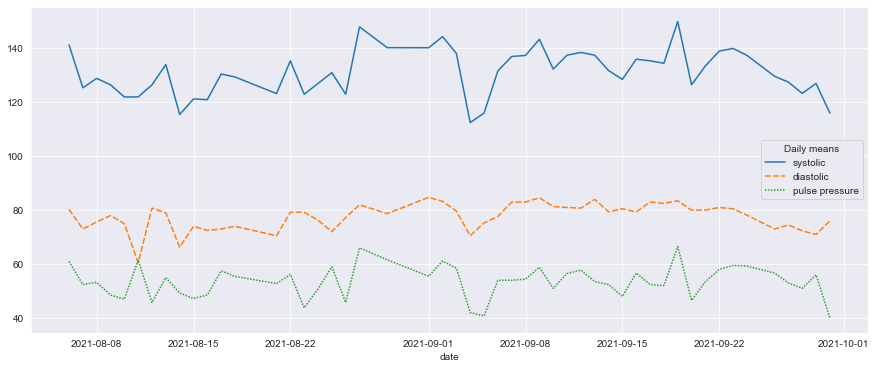

In [33]:
fig, axes_ = pyplot.subplots(figsize=(15, 6))
plot = seaborn.lineplot(data=bpdsi_day, palette='tab10', linewidth=1.5, ax=axes_)
plot.legend(labels=['systolic', 'diastolic', 'pulse pressure'], title='Daily means')
plot

In [34]:
fig.savefig(blood_pressure_jpg)
fig.savefig(blood_pressure_pdf)

# TODO
Drop the max min band on this chart. Replace it with a spearate plot of a systolic scatter chart by day.
Keep a future eye out of how to fix the weird 'max min' legend which ought to be a block of light blue.